In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

# EDA

In [3]:
columns_to_drop = ['id',
                   'name',
                   'host_id',
                   'host_name',
                   # 'neighbourhood_group', wen't to dummies
                   'neighbourhood',
                   # 'room_type', wen't to dummies
                   'minimum_nights',
                   'number_of_reviews',
                   'calculated_host_listings_count',
                   'availability_365',
                   'last_review',
                   'reviews_per_month']

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:xlabel='price', ylabel='Count'>

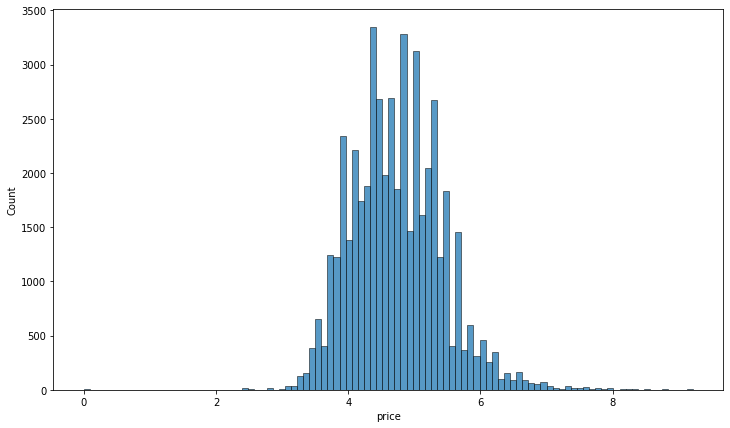

In [6]:
plt.subplots(figsize=(12, 7))
sns.histplot(np.log(df['price']+1), linewidth=0.5, bins=100)

In [7]:
df = df.loc[(df['price'] < df['price'].mean() + df['price'].std()) & (df['price'] > 0)]

## Name

In [8]:
df['name'].value_counts()

Hillside Hotel                                      18
Home away from home                                 17
New york Multi-unit building                        14
Brooklyn Apartment                                  12
Private Room                                        11
                                                    ..
Luxurious Superior Two Bedroom Apt Gym Lincoln C     1
Wyndham Studio Condo with Kitchen SPECIAL TODAY!     1
One room.                                            1
Cozy Room In Upper East Side Apt                     1
25 min to Manhattan: Bed in quiet apartment          1
Name: name, Length: 45801, dtype: int64

In [9]:
df['hotel_name_length'] = df['name'].apply(lambda x: len(str(x)))

In [10]:
df = df.dropna(subset=['name'])

In [11]:
df['hotel_name_is_uppercase'] = df['name'].apply(lambda x: 1 if x.isupper() else 0)

## Neighbourhood Group

In [12]:
df = pd.get_dummies(df, columns=['neighbourhood_group'], prefix='neighbourhood_group')

## Neighbourhood

In [13]:
categories = df['neighbourhood'].value_counts()
neibourhood_pop = pd.get_dummies(df['neighbourhood'].apply(lambda x: categories[x]//1000),
                                 prefix='neibourhood_popularity_in_1000')

In [14]:
df = df.join(neibourhood_pop)

## Latitude and Longitude

/home/kostya/PycharmProjects/venvs/otus_course/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

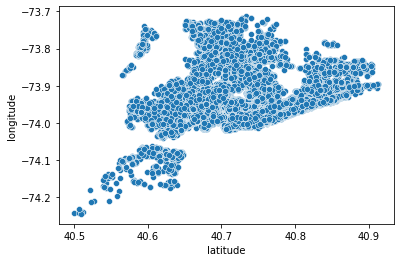

In [15]:
sns.scatterplot(df['latitude'], df['longitude'])

## Room Type

In [16]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,hotel_name_is_uppercase,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neibourhood_popularity_in_1000_0,neibourhood_popularity_in_1000_1,neibourhood_popularity_in_1000_2,neibourhood_popularity_in_1000_3
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,...,0,0,1,0,0,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,...,0,0,0,1,0,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,...,1,0,0,1,0,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,...,0,0,1,0,0,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,...,0,0,0,1,0,0,0,1,0,0


In [17]:
df['room_type'].isna().sum()

0

In [18]:
df['room_type'].value_counts()

Entire home/apt    23530
Private room       22062
Shared room         1140
Name: room_type, dtype: int64

In [19]:
df = pd.get_dummies(df, columns=['room_type'], prefix='room_type')

## Minimum_nights

In [20]:
df['minimum_nights'].isna().sum()

0

In [21]:
df['minimum_nights'].value_counts(normalize=True).sort_index()

1       0.260892
2       0.241034
3       0.161966
4       0.066935
5       0.061521
          ...   
400     0.000021
480     0.000021
500     0.000107
999     0.000064
1250    0.000021
Name: minimum_nights, Length: 107, dtype: float64

In [22]:
100 * (df['minimum_nights'].loc[df['minimum_nights'] > 31].count() / df['minimum_nights'].count())

1.0870495591885645

In [23]:
min_nights_categories = pd.get_dummies(df['minimum_nights'] \
                                           .apply(lambda x: 'more_than_month' if x > 31 else str(x)), 
                                       prefix='min_nights')

In [24]:
df = df.join(min_nights_categories)

## Number of reviews

In [25]:
df['number_of_reviews'].isna().sum()

0

<AxesSubplot:>

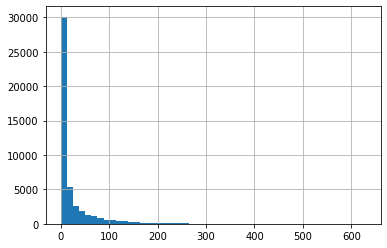

In [26]:
df['number_of_reviews'].hist(bins=50)

<AxesSubplot:>

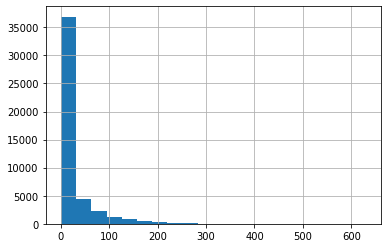

In [27]:
df['number_of_reviews'].hist(bins=20)

In [28]:
df['log_reviews_number'] = np.log(df['number_of_reviews'] + 1)

## Reviews per month

In [29]:
df['reviews_per_month'].isna().sum()

9275

In [30]:
df[['number_of_reviews', 'reviews_per_month']].loc[df['reviews_per_month'].isna()]['number_of_reviews'].value_counts()

0    9275
Name: number_of_reviews, dtype: int64

In [31]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [32]:
df['log_reviews_per_month'] = np.log(df['reviews_per_month'] + 1)

## Calculated Host Listings Count

In [33]:
df['calculated_host_listings_count'].isna().sum()

0

<AxesSubplot:>

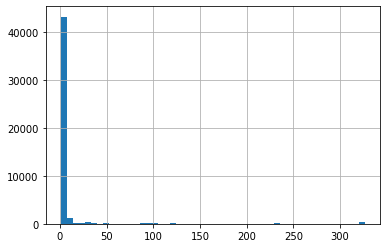

In [34]:
df['calculated_host_listings_count'].hist(bins=50)

<AxesSubplot:>

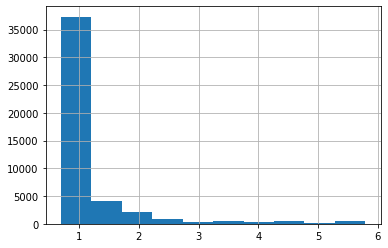

In [35]:
np.log(df['calculated_host_listings_count'] + 1).hist(bins=10)

In [36]:
df['log_calculated_host_listings_count'] = np.log(df['calculated_host_listings_count'] + 1)

## Availability 365

In [37]:
df['availability_365'].isna().sum()

0

<AxesSubplot:>

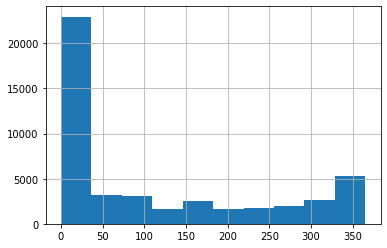

In [38]:
df['availability_365'].hist()

In [39]:
df['availability_365'].describe()

count    46732.000000
mean       110.083348
std        130.560018
min          0.000000
25%          0.000000
50%         41.000000
75%        219.000000
max        365.000000
Name: availability_365, dtype: float64

<AxesSubplot:>

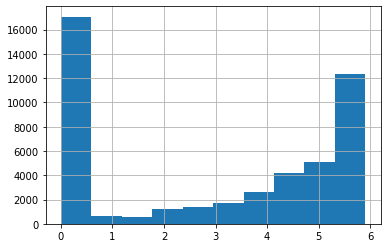

In [40]:
np.log(df['availability_365'] + 1).hist()

In [41]:
df['log_availability_365'] = np.log(df['availability_365'] + 1)

## Last Review

In [42]:
df['last_review'].isna().sum()

9275

In [43]:
df['last_review'].value_counts()

2019-06-23    1359
2019-06-30    1303
2019-07-01    1298
2019-06-24     840
2019-07-07     688
              ... 
2013-01-05       1
2015-06-01       1
2015-02-28       1
2014-04-20       1
2015-03-18       1
Name: last_review, Length: 1756, dtype: int64

In [44]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [45]:
len(df.loc[df['number_of_reviews'] == 0])

9275

## Drop Columns

<AxesSubplot:>

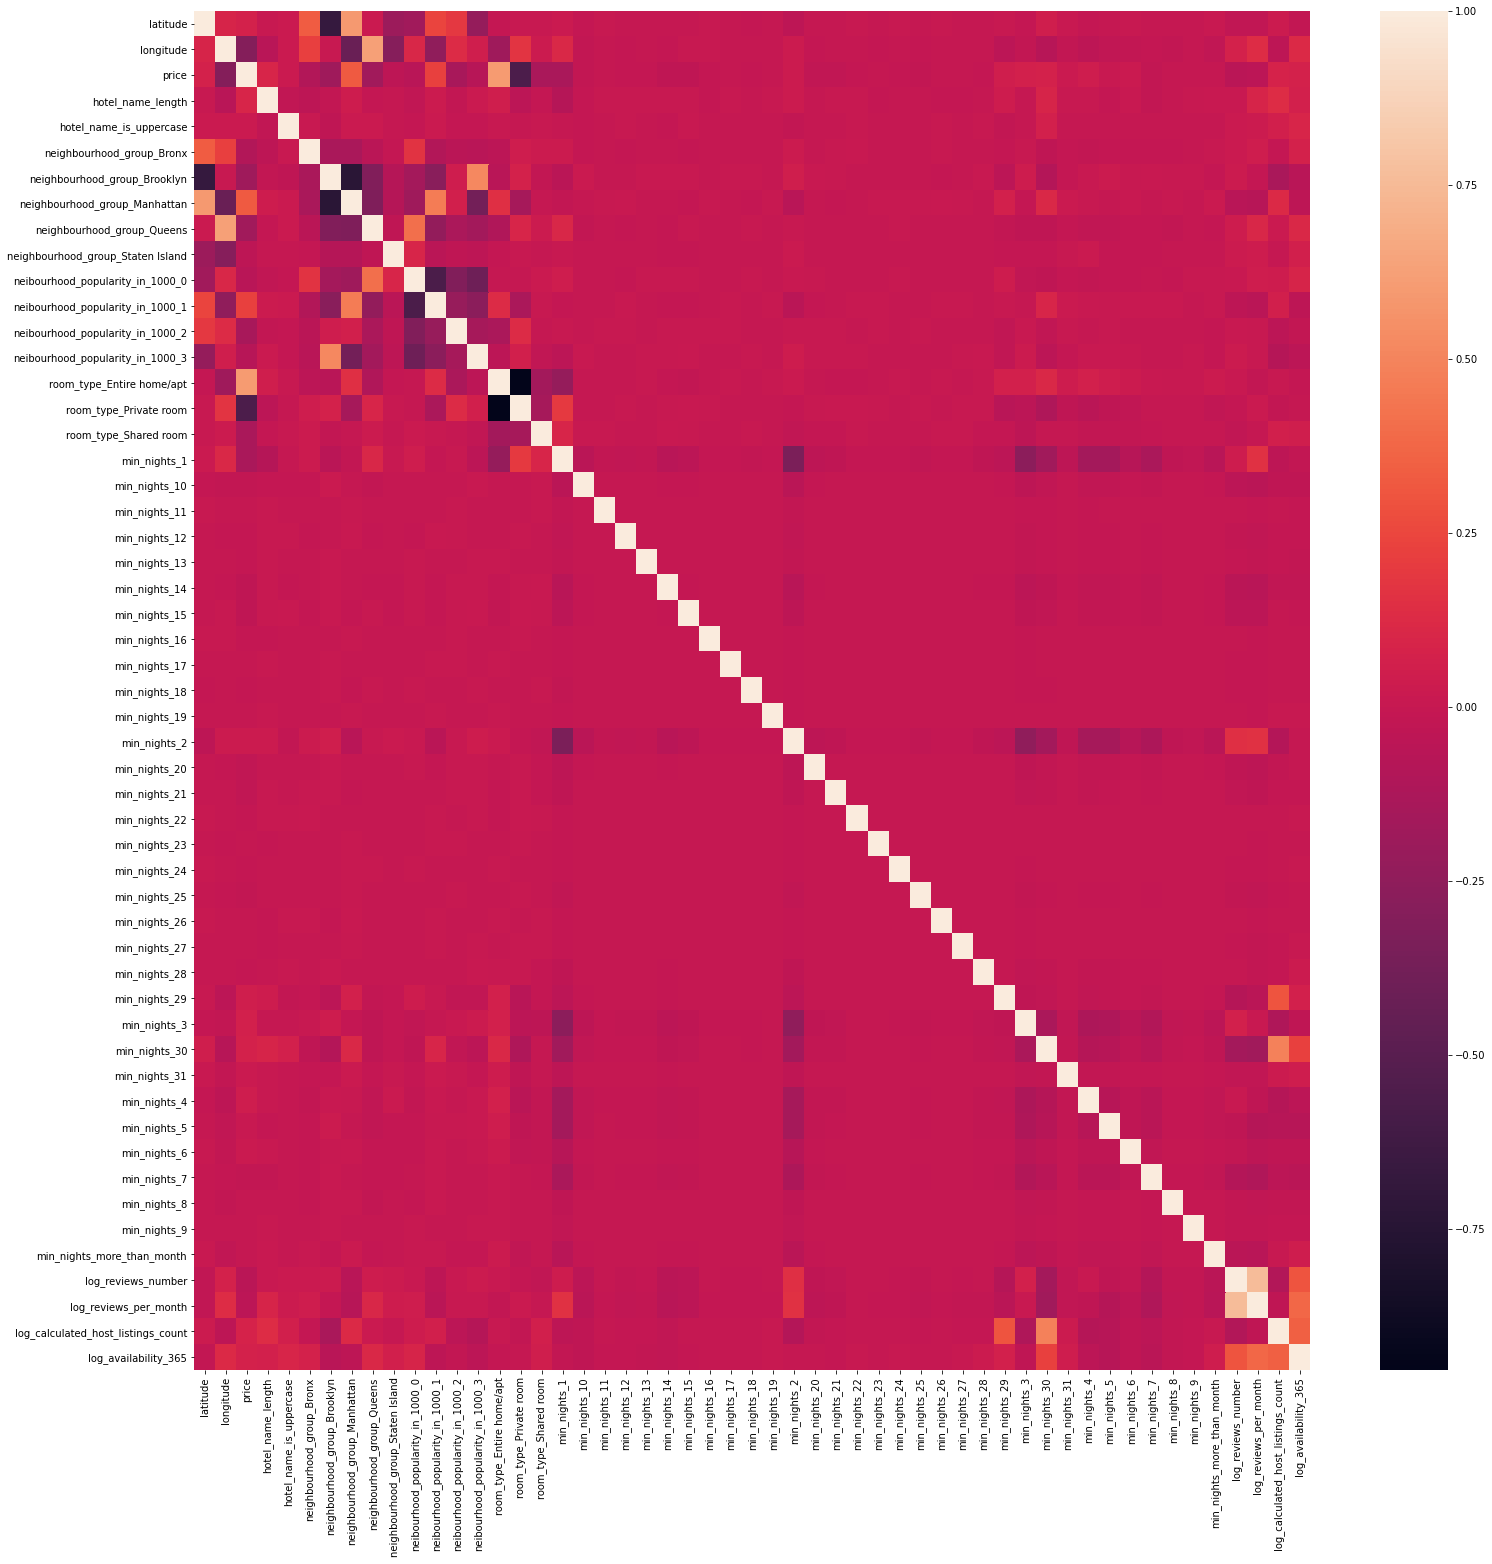

In [46]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.drop(columns=columns_to_drop).corr())

In [47]:
df = df.drop(columns=columns_to_drop)

# Modeling

In [48]:
# price has zero values

df['price'] = df['price'] + 1

## Split Data

In [49]:
df.columns

Index(['latitude', 'longitude', 'price', 'hotel_name_length',
       'hotel_name_is_uppercase', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'neibourhood_popularity_in_1000_0', 'neibourhood_popularity_in_1000_1',
       'neibourhood_popularity_in_1000_2', 'neibourhood_popularity_in_1000_3',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'min_nights_1', 'min_nights_10',
       'min_nights_11', 'min_nights_12', 'min_nights_13', 'min_nights_14',
       'min_nights_15', 'min_nights_16', 'min_nights_17', 'min_nights_18',
       'min_nights_19', 'min_nights_2', 'min_nights_20', 'min_nights_21',
       'min_nights_22', 'min_nights_23', 'min_nights_24', 'min_nights_25',
       'min_nights_26', 'min_nights_27', 'min_nights_28', 'min_nights_29',
       'min_nights_3', 'min_nights_30', 'min_nights_31', 'min_nights_4

In [50]:
import random
random.seed(100)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['price'], axis=1),
    df['price'],
    test_size=0.3
)

In [52]:
X_train.shape, X_test.shape

((32712, 52), (14020, 52))

## Scaling

In [53]:
df.columns

Index(['latitude', 'longitude', 'price', 'hotel_name_length',
       'hotel_name_is_uppercase', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'neibourhood_popularity_in_1000_0', 'neibourhood_popularity_in_1000_1',
       'neibourhood_popularity_in_1000_2', 'neibourhood_popularity_in_1000_3',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'min_nights_1', 'min_nights_10',
       'min_nights_11', 'min_nights_12', 'min_nights_13', 'min_nights_14',
       'min_nights_15', 'min_nights_16', 'min_nights_17', 'min_nights_18',
       'min_nights_19', 'min_nights_2', 'min_nights_20', 'min_nights_21',
       'min_nights_22', 'min_nights_23', 'min_nights_24', 'min_nights_25',
       'min_nights_26', 'min_nights_27', 'min_nights_28', 'min_nights_29',
       'min_nights_3', 'min_nights_30', 'min_nights_31', 'min_nights_4

In [54]:
to_scale_features = ['latitude', 
                     'longitude', 
                     'hotel_name_length',
                     'log_reviews_number',
                     'log_reviews_per_month', 
                     'log_calculated_host_listings_count',
                     'log_availability_365'] 

In [55]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[to_scale_features] = scaler.fit_transform(X_train_scaled[to_scale_features])
X_test_scaled[to_scale_features] = scaler.transform(X_test_scaled[to_scale_features])

## BaseLine

In [56]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred),
       mean_absolute_percentage_error(y_test, y_pred)
    ]
    return stats

In [57]:
measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

""
error_type
MAE
RMSE
R2
MAPE


In [58]:
median_train = y_train.median()

In [59]:
baseline = np.array([median_train] * len(y_test))

In [60]:
measured_metrics['baseline'] = dataframe_metrics(y_test, baseline)
measured_metrics

,error_type,baseline
0,MAE,56.755777
1,RMSE,77.876492
2,R2,-0.103006
3,MAPE,51.571161


In [61]:
y_train.describe()

count    32712.000000
mean       125.445983
std         74.722810
min         11.000000
25%         68.000000
50%        101.000000
75%        166.000000
max        393.000000
Name: price, dtype: float64

In [62]:
y_test.describe()

count    14020.000000
mean       124.798431
std         74.153725
min         11.000000
25%         66.000000
50%        101.000000
75%        165.000000
max        393.000000
Name: price, dtype: float64

## Linear Regression

In [63]:
lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

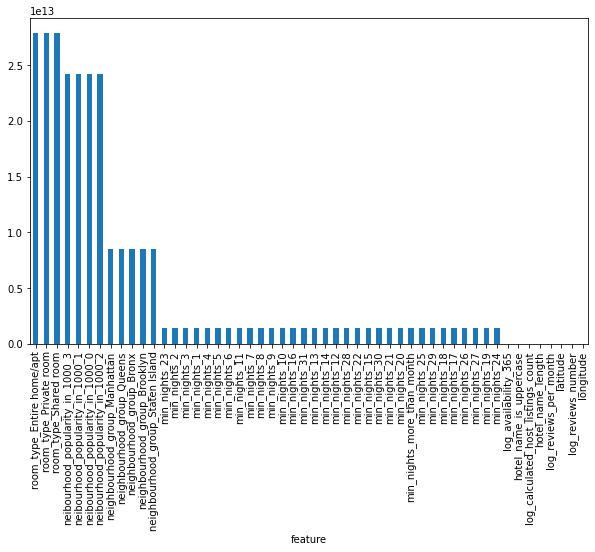

In [64]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": lin_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [65]:
predictions = lin_reg.predict(X_test_scaled)

In [66]:
measured_metrics["lin_reg"] = dataframe_metrics(y_test, predictions)
measured_metrics

,error_type,baseline,lin_reg
0,MAE,56.755777,38.695169
1,RMSE,77.876492,53.301951
2,R2,-0.103006,0.483285
3,MAPE,51.571161,36.169452


In [67]:
df['price'].describe()

count    46732.000000
mean       125.251712
std         74.552334
min         11.000000
25%         67.000000
50%        101.000000
75%        166.000000
max        393.000000
Name: price, dtype: float64

## RidgeCV

In [68]:
ridge_cv = RidgeCV()

ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

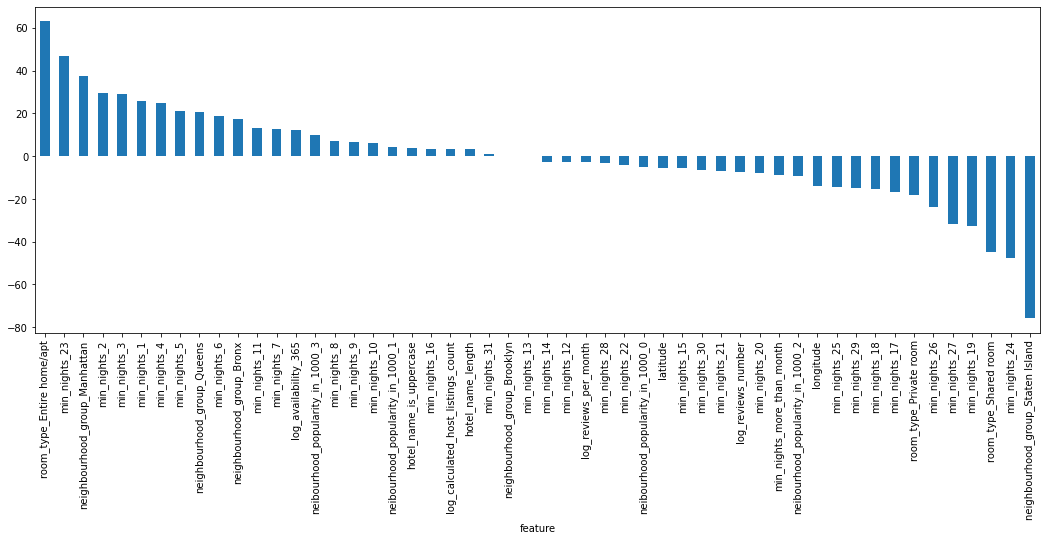

In [69]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": ridge_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(18, 6));

In [70]:
predictions = ridge_cv.predict(X_test_scaled)
measured_metrics["ridge_cv"] = dataframe_metrics(y_test, predictions)
measured_metrics

,error_type,baseline,lin_reg,ridge_cv
0,MAE,56.755777,38.695169,38.685539
1,RMSE,77.876492,53.301951,53.292833
2,R2,-0.103006,0.483285,0.483462
3,MAPE,51.571161,36.169452,36.157417


## Lasso 

In [71]:
lasso_cv = LassoCV()

lasso_cv.fit(X_train_scaled, y_train)

LassoCV()

,error_type,baseline,lin_reg,ridge_cv,lasso_cv
0,MAE,56.755777,38.695169,38.685539,38.641246
1,RMSE,77.876492,53.301951,53.292833,53.277669
2,R2,-0.103006,0.483285,0.483462,0.483755
3,MAPE,51.571161,36.169452,36.157417,36.075115


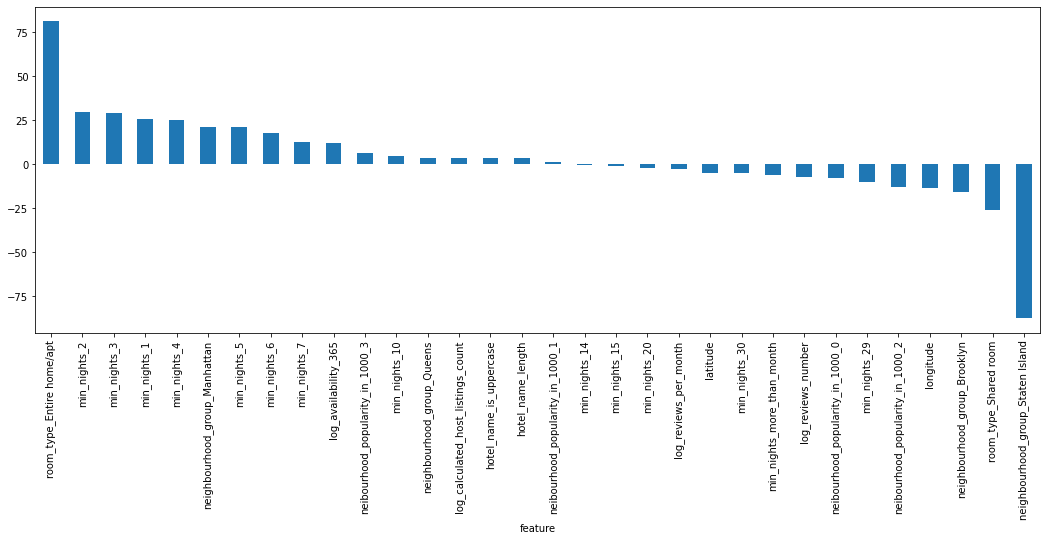

In [73]:
featureImportance = pd.DataFrame({"feature": X_train.columns[lasso_cv.coef_!=0], 
                                  "importance": lasso_cv.coef_[lasso_cv.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(18, 6));

measured_metrics["lasso_cv"] = dataframe_metrics(y_test, lasso_cv.predict(X_test_scaled))
measured_metrics

## RandomForest

In [75]:
rf_reg = RandomForestRegressor(n_jobs=-1)
rf_reg.fit(X_train, y_train)

measured_metrics["rf_reg"] = dataframe_metrics(y_test, rf_reg.predict(X_test))
measured_metrics

,error_type,baseline,lin_reg,ridge_cv,lasso_cv,rf_reg
0,MAE,56.755777,38.695169,38.685539,38.641246,34.778200
1,RMSE,77.876492,53.301951,53.292833,53.277669,49.791437
2,R2,-0.103006,0.483285,0.483462,0.483755,0.549106
3,MAPE,51.571161,36.169452,36.157417,36.075115,31.600336
